In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

#These imports were constructed
from wrangle import wrangle_zillow, train_validate

#Tools to build machine learning models and reports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
#Removes warnings and imporves asthenics
import warnings
#warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None


# Scaling Exercises:

In [2]:
#Found schema on kaggle site
schema = pd.read_excel('zillow_data_dictionary.xlsx')
#schema
schema.loc[[4, 3, 11, 51, 50, 54, 17]]

,Feature,Description
4,'bedroomcnt',Number of bedrooms in home
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
11,'calculatedfinishedsquarefeet',Calculated total finished living area of the home
51,'taxvaluedollarcnt',The total tax assessed value of the parcel
50,'yearbuilt',The Year the principal residence was built
54,'taxamount',The total property tax assessed for that assessment year
17,'fips',Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details


In [3]:
#Get data:
master_df = wrangle_zillow()

In [4]:
#Split data:
train, val, test = train_validate(master_df)

In [5]:
train.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'taxamount', 'fips'], dtype='object')

## Remove outliers

In [6]:
upper_train = train.tax_value.quantile(q=0.95)
lower_train = train.tax_value.quantile(q=0.05)

upper_val = val.tax_value.quantile(q=0.95)
lower_val = val.tax_value.quantile(q=0.05)

upper_test = test.tax_value.quantile(q=0.95)
lower_test = test.tax_value.quantile(q=0.05)

In [7]:
b_train = train[(train.tax_value >= lower_train) & (train.tax_value <= upper_train)]

In [8]:
b_val = val[(val.tax_value >= lower_val) & (val.tax_value <= upper_val)]

In [9]:
b_test = test[(test.tax_value >= lower_test) & (test.tax_value <= upper_test)]

In [10]:
# Do this later when you are done with explore and going into testing.
#b_val = val[(val.tax_value >= lower_bound) & (val.tax_value <= upper_bound)]

## 1. Apply the scalers

### Min-Max Scaling

In [11]:
#Create the scaler object
mm_scaler = sklearn.preprocessing.MinMaxScaler()

#Fit the scaler to the data
mm_scaler.fit(b_train[['sqft']])

MinMaxScaler()

In [12]:
#Adjust the sqft values
train_scaled = mm_scaler.transform(b_train[['sqft']])
val_scaled = mm_scaler.transform(b_val[['sqft']])
test_scaled = mm_scaler.transform(test[['sqft']])

In [13]:
b_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1078679.0,3.288549,0.889885,0.00,3.000,3.00,4.000,16.00
bathrooms,1078679.0,2.181256,0.829878,0.00,2.000,2.00,3.000,20.00
sqft,1078679.0,1786.032974,1276.586853,3.00,1272.000,1622.00,2145.000,952576.00
tax_value,1078679.0,380936.358132,237955.546860,62514.00,203262.000,328493.00,505628.000,1205111.00
year_built,1078679.0,1961.092983,21.507103,1807.00,1950.000,1959.00,1975.000,2016.00
taxamount,1078679.0,4708.122584,2786.291124,16.48,2697.795,4112.62,6088.845,100379.34
fips,1078679.0,6048.591556,20.601259,6037.00,6037.000,6037.00,6059.000,6111.00


Text(0.5, 1.0, 'Scaled')

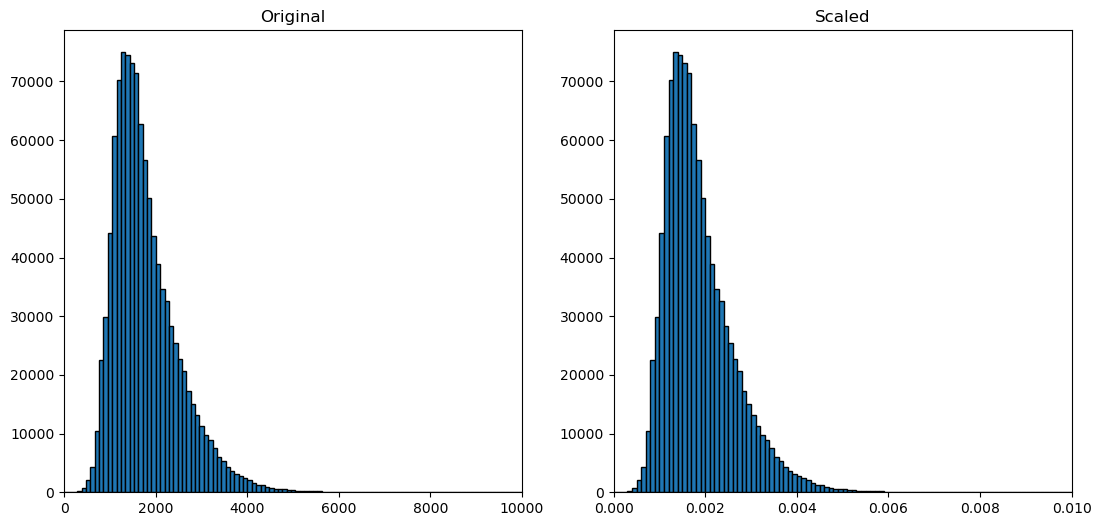

In [14]:
#Dealing with large values in matplotlib is painful
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x=b_train['sqft'], bins=10000, ec='black')
plt.xlim(left=0,right=10000)
plt.title('Original')
plt.subplot(122)
plt.hist(x=train_scaled, bins=10000, ec='black')
plt.xlim(left=0,right=0.01)
plt.title('Scaled')

Takeaway: I don't understand the ranges between the scaled and regular DataFrame. They look similar.

### Standard Scaler

In [15]:
#Create the scaler object
ss_scaler = sklearn.preprocessing.StandardScaler()

#Fit the scaler to the data
ss_scaler.fit(b_train[['sqft']])

StandardScaler()

In [16]:
#Code from the other group
values = ['sqft'] #column names

In [17]:
#This is what the other group had
#train_sscaled[values] = ss_scaler.transform(b_train[values])

In [18]:
#Adjust the sqft values
train_sscaled = ss_scaler.transform(b_train[['sqft']])

In [19]:
val_scaled = ss_scaler.transform(b_val[['sqft']])

In [20]:
test_scaled = ss_scaler.transform(test[['sqft']])

In [21]:
b_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1078679.0,3.288549,0.889885,0.00,3.000,3.00,4.000,16.00
bathrooms,1078679.0,2.181256,0.829878,0.00,2.000,2.00,3.000,20.00
sqft,1078679.0,1786.032974,1276.586853,3.00,1272.000,1622.00,2145.000,952576.00
tax_value,1078679.0,380936.358132,237955.546860,62514.00,203262.000,328493.00,505628.000,1205111.00
year_built,1078679.0,1961.092983,21.507103,1807.00,1950.000,1959.00,1975.000,2016.00
taxamount,1078679.0,4708.122584,2786.291124,16.48,2697.795,4112.62,6088.845,100379.34
fips,1078679.0,6048.591556,20.601259,6037.00,6037.000,6037.00,6059.000,6111.00


Text(0.5, 1.0, 'Scaled')

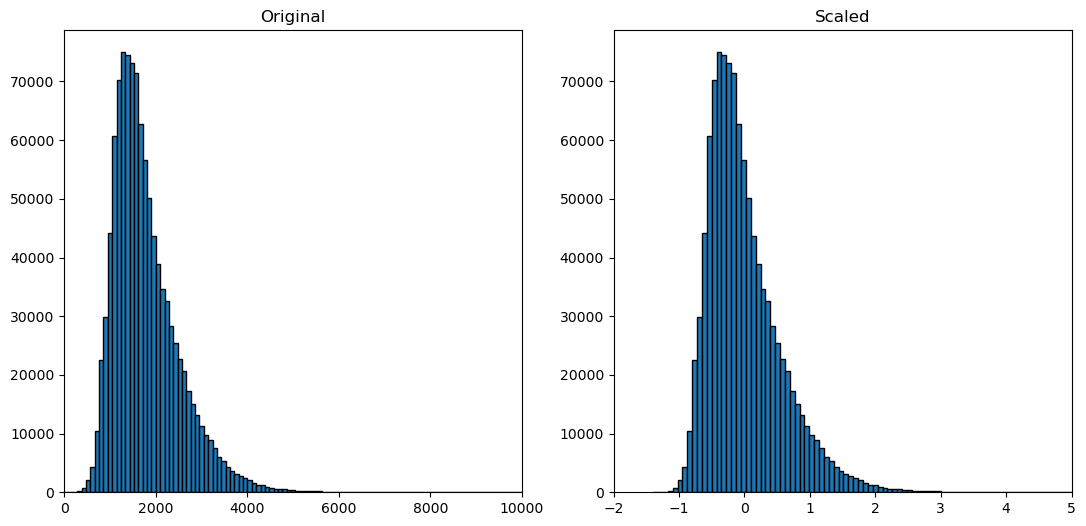

In [22]:
#Dealing with large values in matplotlib is painful
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x=b_train['sqft'], bins=10000, ec='black')
plt.xlim(left=0,right=10000)
plt.title('Original')
plt.subplot(122)
plt.hist(x=train_sscaled, bins=10000, ec='black')
plt.xlim(left=-2,right=5)
plt.title('Scaled')

### RobustScaler

In [23]:
#Create the scaler object
rs_scaler = sklearn.preprocessing.RobustScaler()

#Fit the scaler to the data
rs_scaler.fit(b_train[['sqft']])

RobustScaler()

In [24]:
train_rscaled = rs_scaler.transform(b_train[['sqft']])

In [25]:
b_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1078679.0,3.288549,0.889885,0.00,3.000,3.00,4.000,16.00
bathrooms,1078679.0,2.181256,0.829878,0.00,2.000,2.00,3.000,20.00
sqft,1078679.0,1786.032974,1276.586853,3.00,1272.000,1622.00,2145.000,952576.00
tax_value,1078679.0,380936.358132,237955.546860,62514.00,203262.000,328493.00,505628.000,1205111.00
year_built,1078679.0,1961.092983,21.507103,1807.00,1950.000,1959.00,1975.000,2016.00
taxamount,1078679.0,4708.122584,2786.291124,16.48,2697.795,4112.62,6088.845,100379.34
fips,1078679.0,6048.591556,20.601259,6037.00,6037.000,6037.00,6059.000,6111.00


## 2. Apply the `.inverse_transform` method

In [26]:
#train_rscaled = rs_scaler.transform(b_train[['sqft']])

In [27]:
reverse = ss_scaler.inverse_transform(train_rscaled)

Text(0.5, 1.0, 'UnScaled')

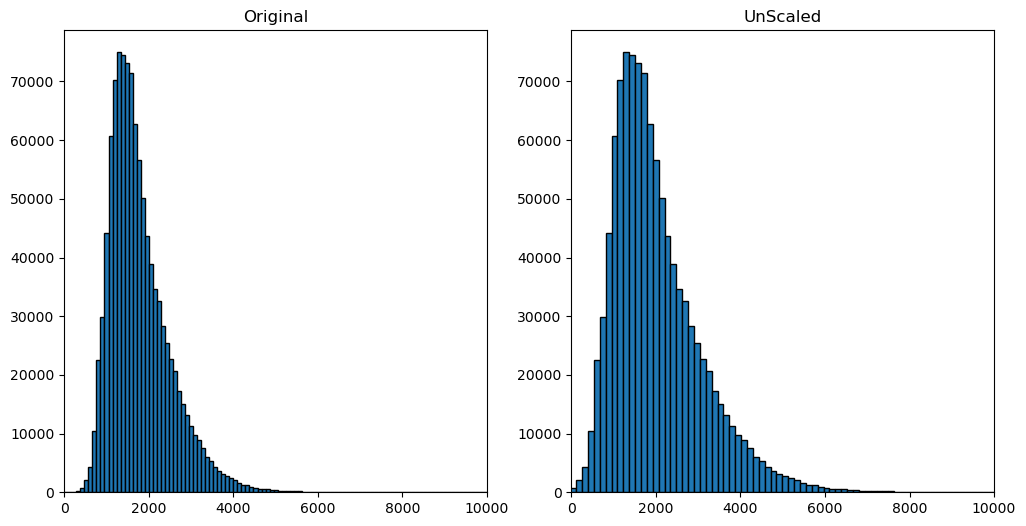

In [28]:
#Dealing with large values in matplotlib is painful
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(x=b_train['sqft'], bins=10000, ec='black')
plt.xlim(left=0,right=10000)
plt.title('Original')
plt.subplot(122)
plt.hist(x=reverse, bins=10000, ec='black')
plt.xlim(left=-0,right=10000)
plt.title('UnScaled')

## 3. QuantileTransformer

In [29]:
qt_scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [30]:
qt_scaler.fit(b_train[['sqft']])

QuantileTransformer(output_distribution='normal')

In [31]:
train_qtscaled = qt_scaler.transform(b_train[['sqft']])

Text(0.5, 1.0, 'Scaled')

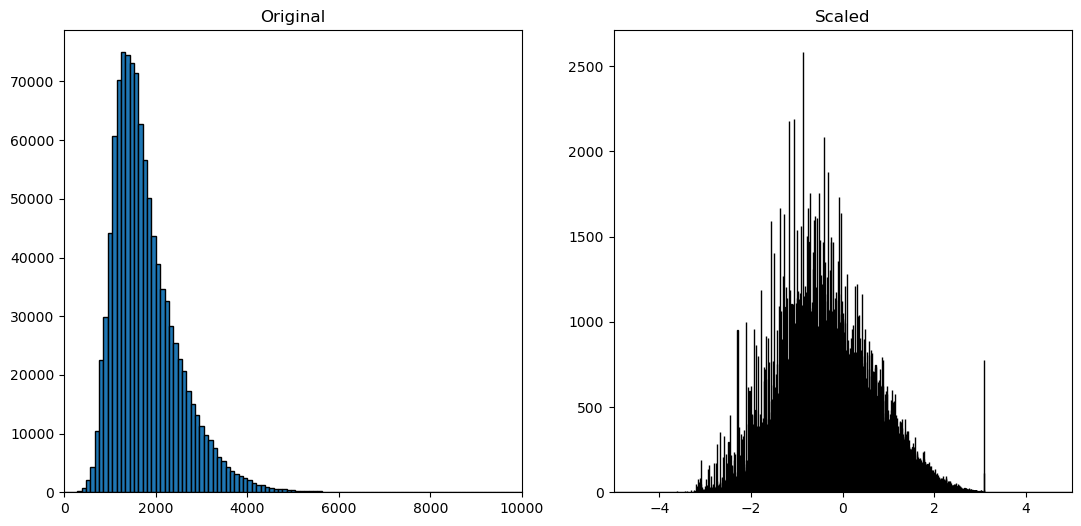

In [32]:
#Dealing with large values in matplotlib is painful
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x=b_train['sqft'], bins=10000, ec='black')
plt.xlim(left=0,right=10000)
plt.title('Original')
plt.subplot(122)
plt.hist(x=train_qtscaled, bins=10000, ec='black')
plt.xlim(left=-5,right=5)
plt.title('Scaled')

## 4. QuantileTransformer omit `output_distribution` argument

In [33]:
qt2_scaler = sklearn.preprocessing.QuantileTransformer()

In [34]:
qt2_scaler.fit(b_train[['sqft']])

QuantileTransformer()

In [35]:
train_qt2scaled = qt2_scaler.transform(b_train[['sqft']])

In [ ]:
#Dealing with large values in matplotlib is painful
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x=b_train['sqft'], bins=10000, ec='black')
plt.xlim(left=0,right=10000)
plt.title('Original')
plt.subplot(122)
plt.hist(x=train_qt2scaled, bins=10000, ec='black')
plt.xlim(left=-.1,right=1.1)
plt.title('Scaled')

## 5.Choose a scaling method for your dataset and write a function

RobustScaler due to zillow having outliers.